In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./insurance.csv")

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# 对性别编码 
data.sex.value_counts()
# =data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
# 把男性编码编为0，女性编为1
# map里面是字典
# 运行过这个代码后再跑一遍，会报错，这个时候，里面的值都变为空值
# 单词写错了也会变成nan
data['sex']=data.sex.map({"male":0,"female":1})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [9]:
# data.smoker.value_counts()

In [10]:
# 编码是否吸烟
#data['smoker']=data['smoker'].map({'yes':1,'no':0}).astype(int)
data['smoker']=data.smoker.map({"no":0,"yes":1})

In [11]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
500,29,0,34.40,0,1,southwest,36197.6990
469,18,1,24.09,1,0,southeast,2201.0971
1122,53,1,36.86,3,1,northwest,46661.4424
338,50,0,32.30,1,1,northeast,41919.0970
997,63,1,36.85,0,0,southeast,13887.9685


In [12]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
# data["region"]=data.region.map({"southeast":0,"southwest":1,"northwest":2,"northeast":3})

In [14]:
data = pd.get_dummies(data=data,columns=(["region"]))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [16]:
X = data.drop("charges",axis=1)
Y = data["charges"]

In [17]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [18]:
#train_test_split(X,Y,test_size=0.2,random_state=1)
# 划分训练集和测试集：80%训练集，20%测试集
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [19]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
216,53,1,26.600,0,0,0,1,0,0
731,53,0,21.400,1,0,0,0,0,1
866,18,0,37.290,0,0,0,0,1,0
202,60,1,24.035,0,0,0,1,0,0
820,45,0,33.700,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
715,60,0,28.900,0,0,0,0,0,1
905,26,1,29.355,2,0,1,0,0,0
1096,51,1,34.960,2,1,1,0,0,0
235,40,1,22.220,2,1,0,0,1,0


In [20]:
# 建模
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([  257.49024669,   242.15306559,   321.62189278,   408.06102001,
       23786.48604536,   584.37636275,   188.27979919,  -453.99951691,
        -318.65664503])

In [23]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
lr.score(X_train,y_train)

0.7477680686451552

In [25]:
lr.score(X_test,y_test)

0.7623311844057112

In [41]:
pred = lr.predict(X_test)

In [42]:
lr.predict([[50,1,20,2,1,1,0,0,0]])

/usr/local/python3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32611.94826694])

In [43]:
lr.predict([[50,1,20,2,0,1,0,0,0]])

/usr/local/python3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8825.46222158])

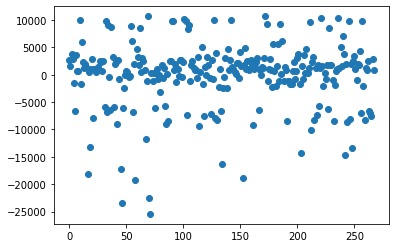

In [44]:
plt.scatter(range(len(X_test)),pred-y_test)

In [45]:
rid = Ridge(alpha=0.5)

In [46]:
rid.fit(X_train,y_train)

Ridge(alpha=0.5)

In [47]:
rid.score(X_train,y_train)

0.7477628479269489

In [56]:
pred1 = rid.predict(X_test)

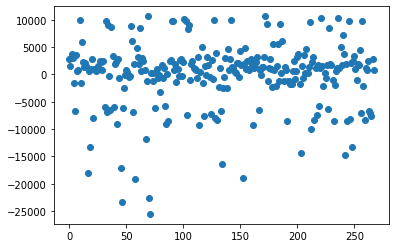

In [57]:
plt.scatter(range(len(X_test)),pred1-y_test)

In [49]:
las = Lasso(alpha=0.5)

In [50]:
las.fit(X_train,y_train)

Lasso(alpha=0.5)

In [61]:
pred2 = las.predict(X_test)

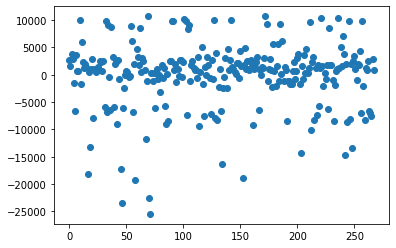

In [62]:
plt.scatter(range(len(X_test)),pred2-y_test)

In [52]:
en = ElasticNet(alpha=0.5,l1_ratio=0.5)

In [53]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.5)

In [54]:
en.score(X_train,y_train)

0.5163571100405651

In [63]:
pred3 = en.predict(X_test)

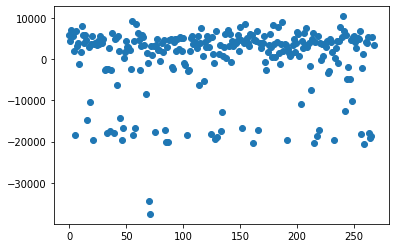

In [64]:
plt.scatter(range(len(X_test)),pred3-y_test)